# Tutoraggio 4

In [2]:
addpath("./functions");

## Esercizio 1

Sia assegnata la funzione:

$$
f(x)=\frac{1}{\pi} \int_{0}^{\pi} \cos (x \sin (t)) d t, \quad x \in[0,5]
$$

### Punto a

Si considerino i seguenti valori di $x$: $x_0 = 0$, $x_1 = 54$, $x_2 = 52$, $x_3 = 15$, $x_4 = 5$.

Calcolare una approssimazione di $f(x_i), i = 0, \dotsc, 4$ utilizzando la formula dei trapezi composita a nodi equispaziati, selezionando opportunamente il numero di nodi per ottenere un’approssimazione di $f(x_i)$ entro una tolleranza di $1.e-2$.

Per ogni $i = 0, \dotsc, 4$ calcolare quindi l’errore relativo tra il valore di $f(x_i)$ calcolato e il valore esatto fornito dalla funzione `besselj(0, x_i)`.

In [5]:
x = [0 5/4 5/2 15/4 5];

for i = 1:5
    f = @(t) 1/pi * cos(x(i) * sin(t)); % integrale definito in funzione di t
    [I, N] = trap_composite(f, 0, pi, 1.e-2);
    f_approx(i) = I;
end

f_approx
f_esatta = besselj(0, x);
err_rel = abs(f_esatta - f_approx) ./ abs(f_esatta);

error: y(1.01): subscripts must be either integers 1 to (2^63)-1 or logicals
error: called from
    trap_composite at line 8 column 3
error: 'f_approx' undefined near line 1 column 1
error: 'f_approx' undefined near line 1 column 26


### Punto b

Determinare il polinomio di interpolazione dei dati $(x_i , f(x_i)), i = 0, 1, 2, 3, 4$ e rappresentarlo in un grafico insieme alla funzione `besselj(0, x)`,$ x \in [0,5]$

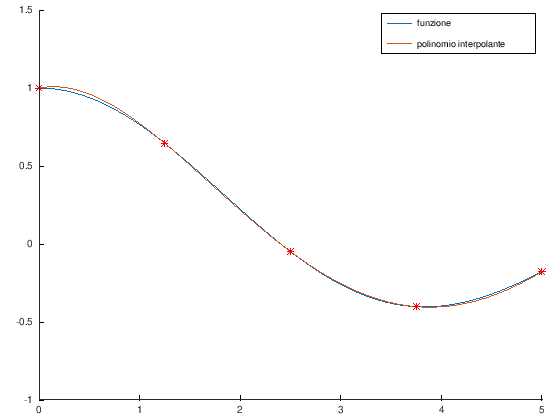

In [8]:
t = linspace(0, 5);
figure
y_interp = interp_lagrange(x, f_esatta, t);
plot( t, besselj(0,t), ...
      t, y_interp, ...
      x, f_esatta, "r*");
box off
legend("funzione", "polinomio interpolante");

In [11]:
format long
err_ass_inf = max(abs(y_interp - besselj(0, t)))

err_ass_inf =    2.314468290792338e-02


### Punto c

Calcolare la costante di Lebesgue dell’insieme di punti $x_i = \frac{5i}{n-1}, i = 0, \dotsc, n-1$ per `n = 10 : 5 : 25`. Rappresentare in un grafico in scala semilogaritmica le costanti di Lebesgue ottenute al variare di $n$.

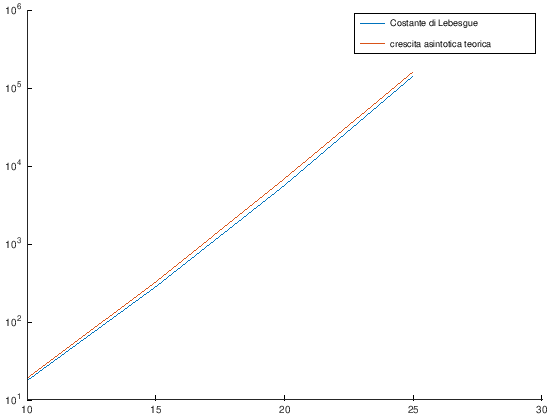

In [15]:
n = (10:5:25);
N = length(n);
% discretizzazione dell'intervallo per il calcolo della costante di Lebesgue
t = linspace(0, 5);

for k = 1:N

    x = 5 * (0:1:n(k) - 1) / (n(k) - 1);
    %L_temp = 1:n(k) % calcolo L_k base di Lagrange
    L_temp = t * 0;
    for j= 1:n(k)
        
        % escluso il vettore con valutazione x(j)
        x_temp = [x(1:j-1), x(j+1:end)];
        % coefficienti dell'unico polinomio che ha come radici quelle in x_(i) tranne x(j)
        p_j = poly(x_temp);
        % numeratore è l'unico polinomio che ha come radici quelle in x_temp
        % denominatore è il numeratore valutato in x(j) con polyval
        p_j = p_j / polyval(p_j, x(j));
        % la costante di Lebesgue dei nodi x(1),...,x(n(k)) si trova con
        % L = max_{t nell'intervallo} somma_{j da 1 a n(k)} |p_j(t)|
        L_temp = L_temp + abs(polyval(p_j, t));
    end
    
    L(k) = max(L_temp); % vettore delle costanti di Lebesgue per ciascun nodo
end

figure
semilogy( n, L, ...
          n, 2.^n./(exp(1) * (n-1).*log(n-1)))
box off
legend("Costante di Lebesgue", "crescita asintotica teorica");

La costante di Lebesgue fornisce una stima dell'errore di interpolazione che si commette a partire da un insieme di nodi di interpolazione scelti.